<a href="https://colab.research.google.com/github/priyankashinde-DS/Play_Store_App/blob/main/Play_Store_App_Review_Cpastone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

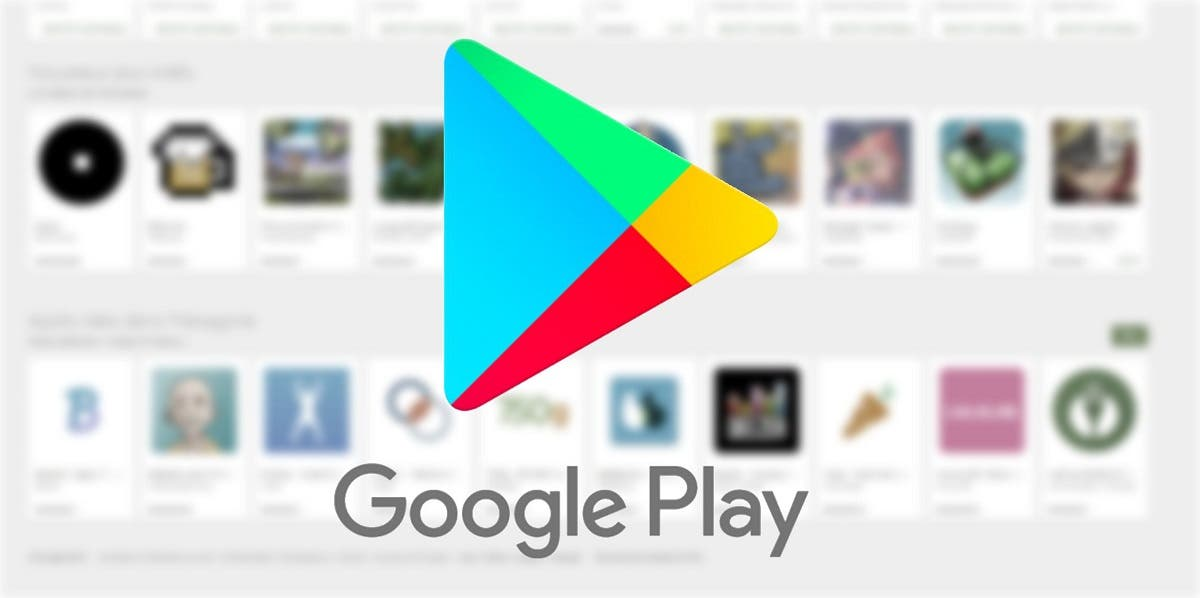

 Google Play, also branded as the Google Play Store and formerly Android Market, is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system and its derivatives as well as Chrome OS, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play also serves as a digital media store, offering music, books, movies, and television programs.Content that has been purchased on Google Play Movies & TV and Google Play Books can be accessed on a web browser, and through the Android and iOS apps.

 App and game developers are the engine of Google Play. Their creativity and passion create amazing experiences for Android users around the world.Google mentioned in their article,"App developers are not just clients – they're partners, and by combining their creativity with our platforms and tools, we’re able to deliver more powerful experiences to people around the world."


Google  global reach and distribution puts their apps and games in front of more than two billion Android users. Google play store also make it easy for developers to build a business - as of February 2020, developers around the world (excluding China) have earned more than $80 billion with Google Play.It's tools enable developers to improve the quality of their apps, respond to user reviews, test new features, track performance data, and much more.

# **“If I had an hour to solve a problem I'd spend 55 minutes thinking about the problem and 5 minutes thinking about solutions.”**
# ― **Albert Einstein**

### I decided to move ahead with the project in 5 steps as breaking down a problem is very important. It provides us the analysis of different variables of data and relations among them.

### **1.Understanding the problem:** Analysing the problem is very importent because output from the data is mainely depends upon which questions are asked to the data.For getting desired output or insights from the data,we need to ask right questions.

### **2.Analysis of Data Set:** Analyzing the given dataset, checking its sanity and then proceeding with further analysis. After being comfortable with the dataset; we explored the various columns and their trends if any.

### **3. Visualization :**A picture is worth 1000 words, taking it seriously and tried to explain relation among variables by different types of visualization techniques.

### **4.Feature Selection:** Selecting only those features which is most importent for finding out correct insights from the data set.

### **5.Conclusion:**In last step summing up results and came up with the inferences and recommendations.

# **PROBLEM STATEMENT**
## **Explore and analyze the data to discover key factors responsible for app engagement and success.**


## **Let's first understand what is an app engagement ?**

### App engagement is the ways in which users interact with an app. App engagement is defined by a set of metrics that measure user interaction with an app. 

### It is not a state but a process of creating and nurturing valuable relationships with app users. Increasing engagement is one of the main goals of an app, as it is the main driver of customer loyalty and growing user LTV(Life Time Value).

### Following are the few user's engagement metrices:

*   Number of Downloads.
*   Total Number of User's (New & Old).
*   Active app users.
*   Session interval
*   Session length.
*   Retention

# **What is app Success ?**

### A successful app combines three aspects in a smart way:
###  Market, User and the Product itself. 

### All these factors need to work together to give users a unique value, great usability, and good performance. Accessibility is the last but not least key feature of a successful mobile app.










### To discover key features which affects the app engagement and success we need to analysis the significance each and every feature carefully.

In [1]:
# Mounting Google Drive in the notebook.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Imports**: Let us start by importing some of the required libraries with which we will be working on.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Importing Datasets:** Loading the data sets using Pandas Data Frame.

We have two diiferent data sets for given project,so importing them at two diferent data frames.

In [7]:
# Play Store Data
play_store_app_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/play sore app/Play Store Data.csv')

In [8]:
# App Review Datset
app_review = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/play sore app/User Reviews.csv')

# **Play Store Applications Data Set**

In [9]:
play_store_app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
play_store_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


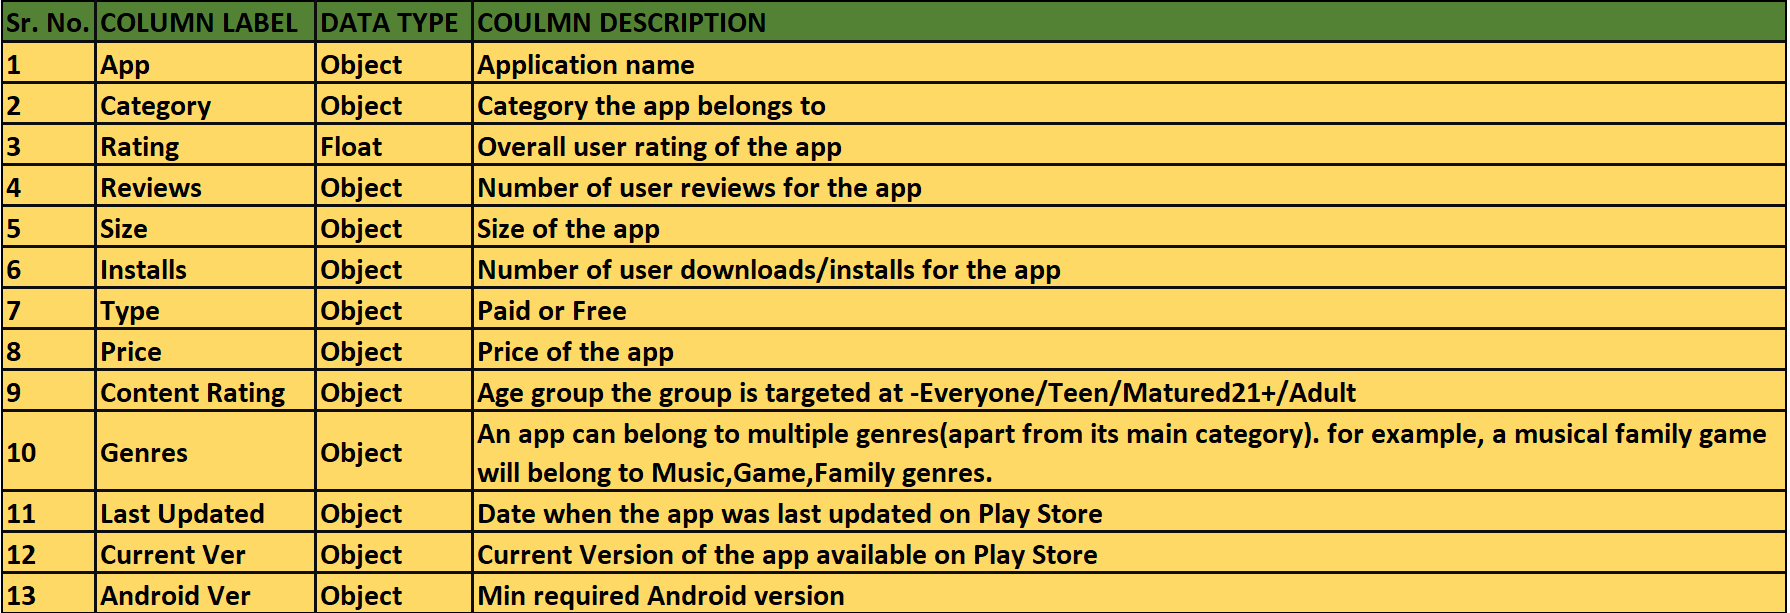

In [11]:
print("The Total Features:",play_store_app_data.columns.to_list())

The Total Features: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [12]:
# Checking Total number of duplicate rows
print("Total number of duplicate rows:",play_store_app_data.duplicated().sum())

Total number of duplicate rows: 483


In [13]:
# Deleting all the duplicated row's from the Dataset
play_store_app_data.drop_duplicates(inplace=True)

In [14]:
# Checking Total number of null values in dataset for each column
play_store_app_data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Total 1465 rows with null values in **Rating** column in the Dataset i.e. for these applications customer didn't rate anything.
As compared to other values this is huge and might be possible there is a hidden pattern in this so creating a new data frame for the null values.

In [15]:
# Creating a Data Frame
null_values_play_store_app_data=pd.DataFrame(play_store_app_data[play_store_app_data.isna().any(axis=1)])

In [16]:
# Resetting the Index
null_values_play_store_app_data.reset_index(inplace=True,drop=True)

In [17]:
null_values_play_store_app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
2,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
3,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
4,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up


There is difference between the **"0"** Rating and **"Rating Not Given"**.

A **"Zero"** Rating means that a customer was unsatisfied with the application, whereas a **"Rating Not Given"** means that there were so many reasons behind the customer's decision not to rate the particular application.

Therefore, retaining or replacing these rows with "0" is not a good idea. Let's get rid of all Null Value rows from the Data Set.

In [18]:
# Delecting row's with null values
play_store_app_data.dropna(inplace=True)

In [19]:
print("{0} rows and {1} columns in new dataset after data cleaning.".format(play_store_app_data.shape[0],play_store_app_data.shape[1]))

8886 rows and 13 columns in new dataset after data cleaning.


## **After removing the possible Varacity from the data now we can explore the features in details.**

In [20]:
play_store_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


Data types for a few features are in the wrong format, so they will need to be changed before further evaluation. Let's go through each feature one at a time and see how it is structured using some visualizations

**CATEGORY**:Applications are classified under this feature.
Category describes the use case of the perticular application.Believe it or not, your app category can make a world of difference when it comes to properly promoting your solution or game in the Google Play stores.

It's easy to guess by it's name that **"Category"** is a categorical variable in this data set.

In [21]:
# List Of Categories
categories_list=list(play_store_app_data['Category'].unique())
print(f"Total Number of categories are :{len(categories_list)} and are as follow{categories_list}")

Total Number of categories are :33 and are as follow['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Category App Count')

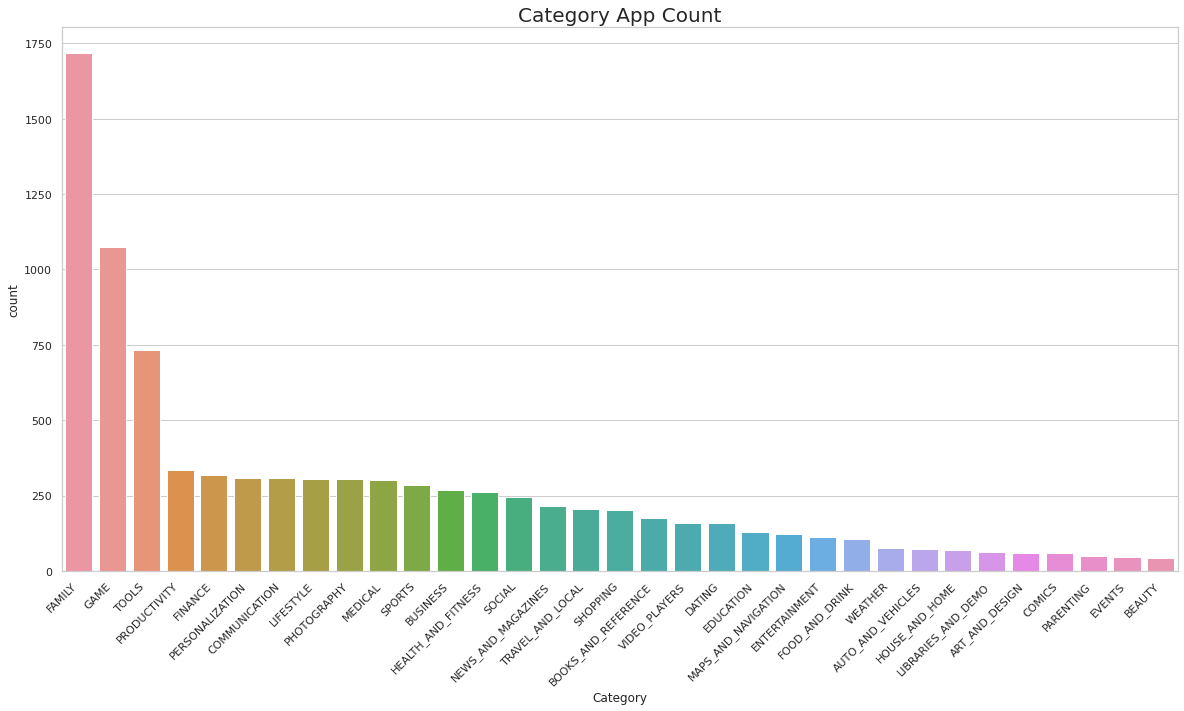

In [22]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax=sns.countplot(play_store_app_data['Category'],order=play_store_app_data['Category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
ax.set_title('Category App Count',fontsize=20)

We can see from the above figure that certain categories are the most common in this data set.

**Rating:** Rating is the average of overall ratings given by users.

Therefore, it is crucial to the success of an application.
 Android app rating will be a more accurate representation of the app's current quality.Play store rating ranges between 1(Low) to 5 (Very good).

In [23]:
play_store_app_data['Rating'].describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


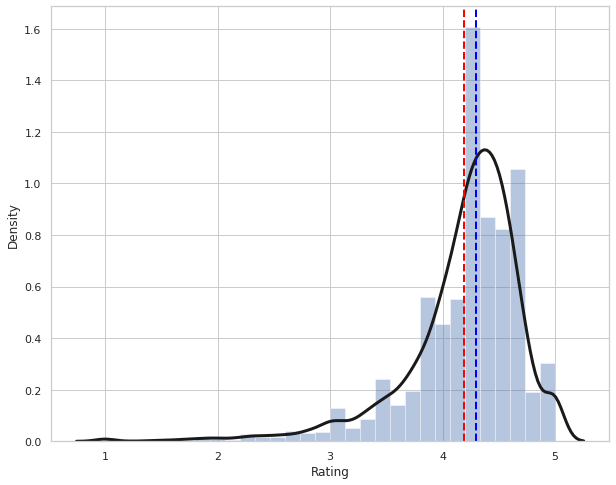

In [24]:
plt.figure(figsize=(10,8))
ax=sns.distplot(play_store_app_data['Rating'],bins=30,kde_kws={"color": "k", "lw": 3, "label": "KDE"})
ax.axvline(play_store_app_data['Rating'].mean(),color='Red',linestyle='dashed',linewidth='2')
ax.axvline(play_store_app_data['Rating'].median(),color='Blue',linestyle='dashed',linewidth='2')

The above figure shows that most applications received ratings between 4 and 5.

Due to the fact that rating is not mandatory, most users choose to skip it.

**Review:**The number of reviews given by user to application.
We can see that the data type for this feature must be integer. 

However, in the data set it is object type so they will have to change to integer.



In [25]:
# Converting values into integer format.
play_store_app_data['Reviews']=play_store_app_data['Reviews'].astype(int)

In [26]:
play_store_app_data['Reviews'].describe()

count    8.886000e+03
mean     4.730928e+05
std      2.906007e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.723000e+03
75%      7.131325e+04
max      7.815831e+07
Name: Reviews, dtype: float64

**SIZE:**  This feature explain the size of application in MB(Megabyte) and KB(Kilobyte).

We can see that the data type for this feature should be integer. 
However, in the data set it is object type so they will have to change to integer.
We also need to scale them into one feature.
1MB=1024KB

In [27]:
#Replacing the k by dividing  the value with 1000 or replacing it with e-3 (1MB=1024KB)
play_store_app_data['Size'] = play_store_app_data['Size'].apply(lambda x:x.replace('k', 'e-3'))

In [28]:
#Replacing the M symbol by with 
play_store_app_data['Size'] = play_store_app_data['Size'].apply(lambda x:x.replace('M', ''))

In [29]:
#Replacing the Varies with device value with NaN
play_store_app_data['Size'] = play_store_app_data['Size'].replace('Varies with device', np.NaN)

In [30]:
#lastly convert all values to numeric value
play_store_app_data['Size'] = pd.to_numeric(play_store_app_data['Size'])

In [31]:
#lastly convert all values to numeric value
play_store_app_data['Size'] = play_store_app_data['Size']

In [32]:
play_store_app_data['Size'].describe()

count    7418.000000
mean       22.760829
std        23.439210
min         0.008500
25%         5.100000
50%        14.000000
75%        33.000000
max       100.000000
Name: Size, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


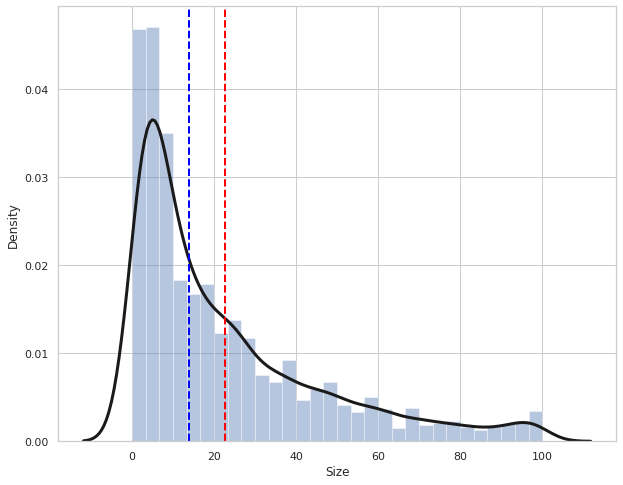

In [33]:
# Plot for Density distribution of Size in MB.
plt.figure(figsize=(10,8))
ax=sns.distplot(play_store_app_data['Size'],bins=30,kde_kws={"color": "k", "lw": 3, "label": "KDE"})
ax.axvline(play_store_app_data['Size'].mean(),color='Red',linestyle='dashed',linewidth='2')
ax.axvline(play_store_app_data['Size'].median(),color='Blue',linestyle='dashed',linewidth='2')


Based on the above figure, we can conclude that the application size lies between the **0 MB** and the **100 MB**.

The **Median** (Red Line) is greater than **Mean** (Blue Line) so data is **Negatively Skewed**.**75%** of application size lies between the range **0 MB** to **33 MB**.

**INSTALLS:** This feature shows how many times an application has been downloaded from the Google Play Store.

The variable is a **Numeric** one, but it has an "**Object**" data type in the data set, so it needs to be converted to **Numeric**.

Values have an **"+"** within them, which indicates the application has downloaded more data than the value specified.

Eliminating **"+"** will allow us to retain the original data type.

In [34]:
# Remove "+" sign from Installs column
play_store_app_data['Installs'] = play_store_app_data['Installs'].apply(lambda x: x.strip('+'))

In [35]:
# Remove the "," symbol from the numbers
play_store_app_data['Installs'] = play_store_app_data['Installs'].apply(lambda x: x.replace(',',''))

In [36]:
# Convert values from string type to numeric type
play_store_app_data['Installs'] = pd.to_numeric(play_store_app_data['Installs'])

In [37]:
play_store_app_data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [38]:
print(f"Total number of descrete categories in the feature install is {len(play_store_app_data['Installs'].unique())}")

Total number of descrete categories in the feature install is 19


For a instance we can assume installs as a Categorical variable as it is divided into only **19** different parts.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Applications count as per Installed Number')

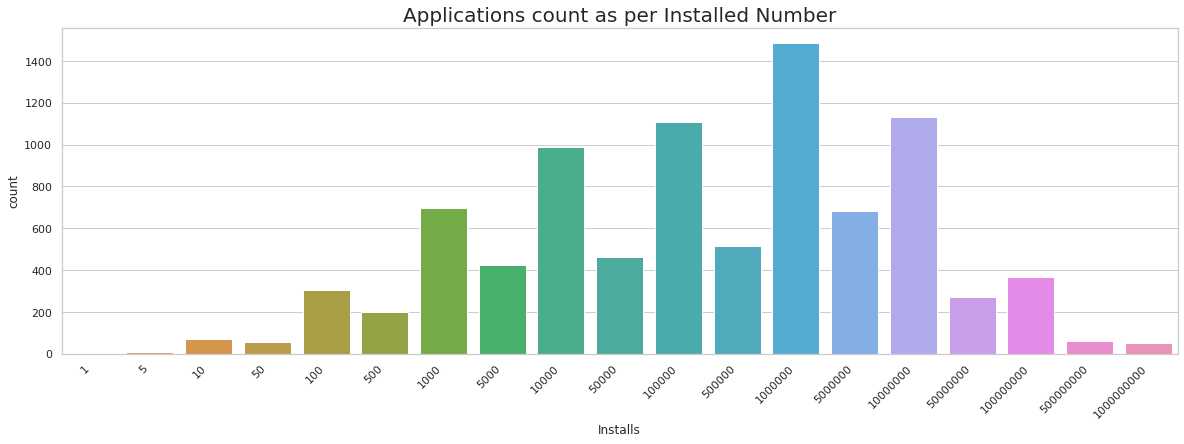

In [39]:
plt.figure(figsize=(20,6))
ax=sns.countplot(play_store_app_data['Installs'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
ax.set_title('Applications count as per Installed Number',fontsize=20)

The above figure gives us the impression that the applications have been downloaded at least once and at maximum one billion times.


In [40]:
play_store_app_data['Installs'].describe()

count    8.886000e+03
mean     1.650061e+07
std      8.640413e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

**TYPE:** This is a categorical variable, which indicates whether the application is Free to install or if the user must pay a fee to install it.

Categories are **Free** and **Paid**.

In [41]:
print(f"There are {play_store_app_data['Type'].value_counts()[0]} applications which can be installed for free and {play_store_app_data['Type'].value_counts()[1]} are paid applications.")

There are 8275 applications which can be installed for free and 611 are paid applications.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


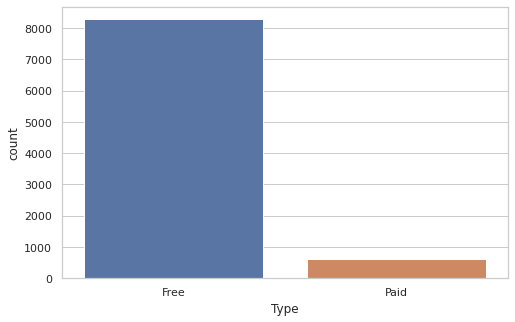

In [42]:
# Count Plot for Application Type
plt.figure(figsize=(8,5))
sns.countplot(play_store_app_data['Type'])

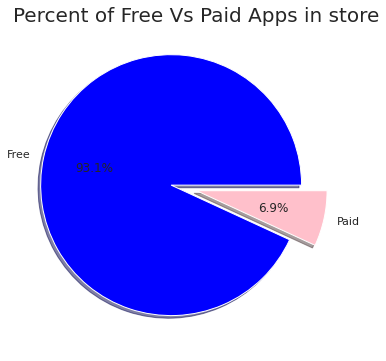

In [43]:
plt.figure(figsize=(6,6))
labels = play_store_app_data['Type'].value_counts(sort = True).index
sizes = play_store_app_data['Type'].value_counts(sort = True)
colors = ["blue","pink"]
explode =(0.2,0)
plt.pie(sizes,explode=explode, labels=labels,colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

**PRICE:** This feature shows the Price of the appliication in US dollar.

Only those applications who falls under paid category also come within this category this means there is a clear relationship between this two features.

The variable is a **Numeric** one, but it has an "**Object**" data type in the data set, so it needs to be converted to **Numeric**.

Values have an **"$"** within them, which indicates the price of application in US Dollar.

Eliminating **"$"** will allow us to retain the original data type.

In [44]:
# Remove special symbol $ 
play_store_app_data['Price'] = play_store_app_data['Price'].apply(lambda x: x.strip('$'))

In [45]:
# Convert price column into numeric
play_store_app_data['Price'] = pd.to_numeric(play_store_app_data['Price'])

In [46]:
play_store_app_data['Price'].describe()

count    8886.000000
mean        0.963526
std        16.194792
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

There are too many zeros in this feature, since **93%**of applications are **free**.

Let's take another Data Frame where only paid applications are present, so that we can explore the price feature in more detail.

In [47]:
# Creating a data frame with only paid applications
paid_applications_df=play_store_app_data[play_store_app_data['Type']=='Paid']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Applications count as per Price')

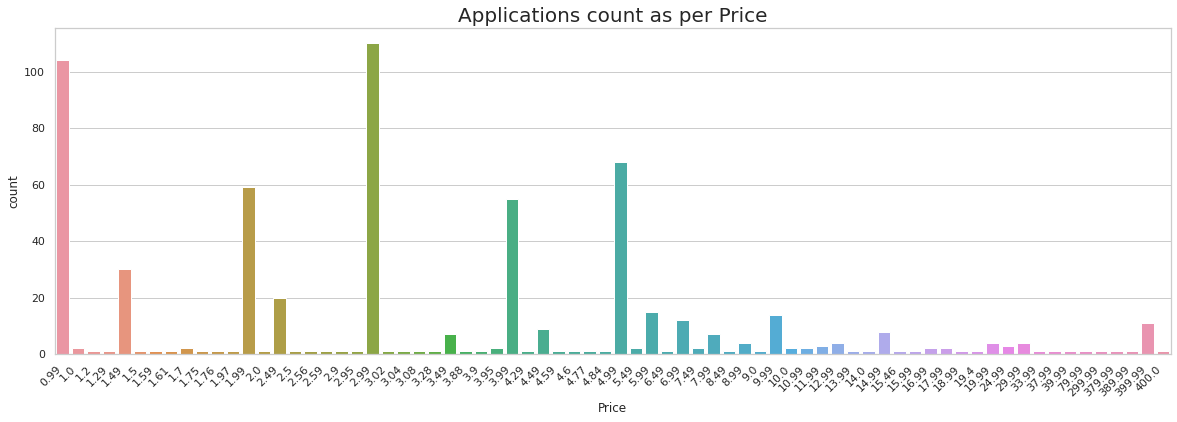

In [48]:
plt.figure(figsize=(20,6))
ax=sns.countplot(paid_applications_df['Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
ax.set_title('Applications count as per Price',fontsize=20)

In [49]:
paid_applications_df['Price'].describe()

count    611.000000
mean      14.012913
std       60.307316
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

**CONTENT RATING:**  Content ratings are used to inform consumers, especially parents, of potentially objectionable content that exists within an app. They also help filter or block your content in certain territories or to specific users where required by law, and determine your app's eligibility for special developer programs. 



There are six categories of applications based on the age of the user.

**1.Everyone:** Content is generally suitable for all ages. May contain minimal cartoon, fantasy or mild violence and/or infrequent use of mild language.

**2.Teen:** Content is generally suitable for ages 13 and up. May contain violence, suggestive themes, crude humor, minimal blood, simulated gambling and/or infrequent use of strong language.

**3.Everyone 10+:** Content is generally suitable for ages 10 and up. May contain more cartoon, fantasy or mild violence, mild language and/or minimal suggestive themes.

**4.Mature 17+:** Content is generally suitable for ages 17 and up. May contain intense violence, blood and gore, sexual content and/or strong language.

**5.Adults only 18+:** Content suitable only for adults ages 18 and up. May include prolonged scenes of intense violence, graphic sexual content and/or gambling with real currency.

**6.Unrated:** Unrated apps are treated like high-maturity apps for the purpose of parental controls until they get a rating. If you set up parental controls to restrict apps and games to a certain rating, you won't see any Unrated apps in the Play Store app.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Applications count as per Contain Rating')

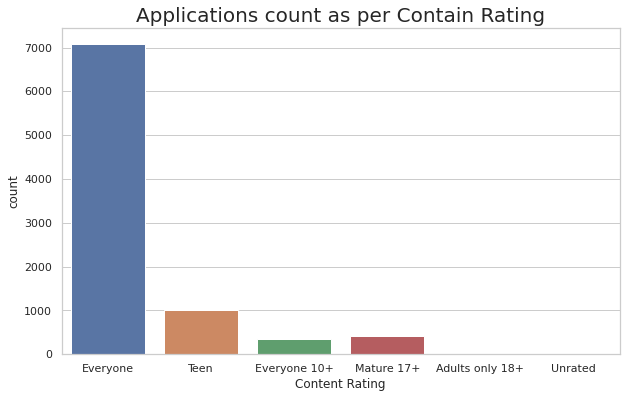

In [50]:
plt.figure(figsize=(10,6))
ax=sns.countplot(play_store_app_data['Content Rating'])
ax.set_title('Applications count as per Contain Rating',fontsize=20)

**GENRES:** Genres are sub part of Category feature in the data set.

A single category is further divided into multiple genres in order to provide a more detailed explanation or differentiation of the applications.

***For Example:***

**App Name**-Mcqueen Coloring pages

**Category:** ART_AND_DESIGN	

**Genres:** Art & Design;Action & Adventure

In [51]:
# Creating a list of Unique Genres
genres_list=list(play_store_app_data['Genres'].unique())

print(f"Total Number of genres are :{len(genres_list)}")
print(genres_list)

Total Number of genres are :115
['Art & Design', 'Art & Design;Pretend Play', 'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business', 'Comics', 'Comics;Creativity', 'Communication', 'Dating', 'Education;Education', 'Education', 'Education;Creativity', 'Education;Music & Video', 'Education;Action & Adventure', 'Education;Pretend Play', 'Education;Brain Games', 'Entertainment', 'Entertainment;Music & Video', 'Entertainment;Brain Games', 'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle', 'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card', 'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing', 'Casual;Creativity', 'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing', 'Simulation;Education', 'Action;Action & Adventure', 'Casual;Brain Games', 'Simulation;Action & Adventur

In [52]:
print(categories_list)

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']


In [53]:
genres_count_df=pd.DataFrame(play_store_app_data['Genres'].value_counts(),)

**LAST UPDATED:** This feature shows on which date an application developer released a new version or a new update.

Updating apps gives user access to the latest features and improves app security and stability.

Need to change the values to Date-Time format to reduce conversion time.

In [54]:
# Specifying the datetime format significantly reduces conversion time
play_store_app_data['Last Updated'] = pd.to_datetime(play_store_app_data['Last Updated'])
play_store_app_data['Last Updated'] = play_store_app_data['Last Updated'].dt.strftime('%d/%m/%y')

In [55]:
play_store_app_data['Last Updated']

0        07/01/18
1        15/01/18
2        01/08/18
3        08/06/18
4        20/06/18
           ...   
10834    18/06/17
10836    25/07/17
10837    06/07/18
10839    19/01/15
10840    25/07/18
Name: Last Updated, Length: 8886, dtype: object

For each and every application, the last update date can be different, so let's divide and make some slots so we can work on them.

**CURRENT VERSION:** It is the last updated or Newest release version of the perticular application.

It is entirely up to the developer of the specific application when and what to release, as well as the name of the version.

Most users are unaware of these updates and releases since most applications get auto-updated if the user specifies the setting.

Developers always release minor and major updates on a regular basis to fix bugs, etc.
This is not a very informative feature as users do not pay much attention to it

In [56]:
play_store_app_data['Current Ver'].value_counts()

Varies with device    1258
1.0                    451
1.1                    190
1.2                    126
2.0                    117
                      ... 
0.1.187945513            1
68.0.3440.91             1
4.8.2.2195               1
2.32                     1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

**ANDROID VERSION:** This is minimun Android OS version of user's device.required to install application in the user's device.



In [57]:
play_store_app_data['Android Ver'].value_counts()

4.1 and up            1987
4.0.3 and up          1197
Varies with device    1178
4.0 and up            1092
4.4 and up             789
2.3 and up             573
5.0 and up             481
4.2 and up             330
2.3.3 and up           238
3.0 and up             207
2.2 and up             203
4.3 and up             199
2.1 and up             112
1.6 and up              87
6.0 and up              46
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              16
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              5
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

How do you define app engagement?
App engagement is defined by a set of metrics that measure user interaction with an app. Common engagement metrics can include how many times a user opens the app, the duration of a usage session, and what actions a user takes within an app.
How is app engagement measured?
10 Key Metrics to Measure User Engagement in Mobile Apps
Number of downloads. To achieve app success, the very first step is reaching a substantially large number of downloads. ...
Total number of users (new and old) ...
Active app users. ...
Session interval. ...
Session length. ...
Time in the app. ...
Screen flow. ...
Retention.

What determines a successful app?
A successful app combines three aspects in a smart way: market, user and the product itself. All these factors need to work together to give users a unique value, great usability, and good performance. Accessibility is the last but not least key feature of a successful mobile app.